Developing Prophet model for bin 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

from math import floor
from fbprophet import Prophet

import os 

from google.colab import drive
drive.mount('/content/gdrive')

np.random.seed(9001)
#WHAT!? 9000!?!?

Mounted at /content/gdrive


#Load Data

In [ ]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Data/W_Store_Bin2.csv')
df=df.drop(columns=['Unnamed: 0','Weekly_Sales','Weekly_Sales_log'])
df.describe()

,log_minMax
count,143.000000
mean,0.457242
std,0.150340
min,0.000000
25%,0.390295
50%,0.468357
75%,0.532382
max,1.000000


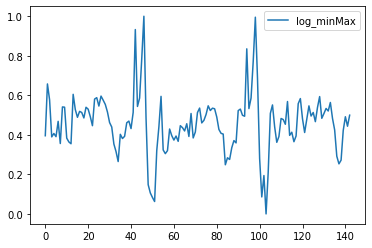

In [ ]:
df.plot()
plt.show()

#Model

##Model Prep

In [ ]:
#Prophet demands columns be designated as ds and y
df=df.rename(columns={'Date':'ds','log_minMax':'y'})

###Train, Validation, And Test Split

In [ ]:
trainInd=floor(len(df)*.8)
valInd=floor(len(df)*.9)
train=df.loc[:trainInd,:]
val=df['ds'][trainInd:valInd]
val=val.to_frame()
test=df['ds'][valInd:]
test=test.to_frame()

##Model Creation And Validation

In [ ]:
model = Prophet()
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast=model.predict(val)

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2012-04-13  0.404879    0.308447    0.507492
1 2012-04-20  0.384625    0.276876    0.490551
2 2012-04-27  0.397059    0.292767    0.492773
3 2012-05-04  0.434349    0.336784    0.534038
4 2012-05-11  0.468925    0.372683    0.573179


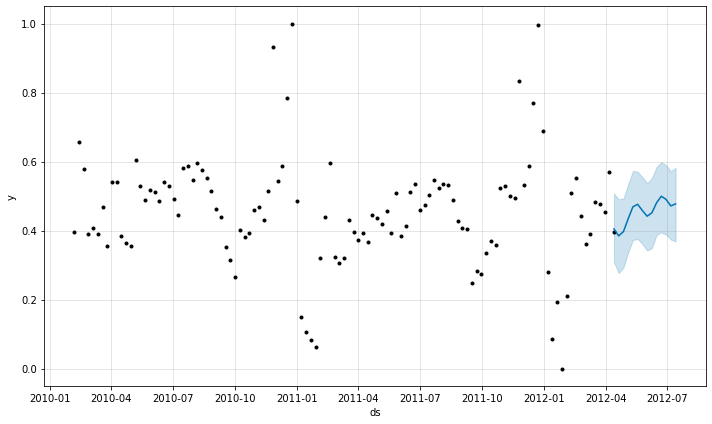

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.0,14.0,14.000000
mean,0.444019,0.352101,0.552930,0.443971,0.444063,0.008616,0.008616,0.008616,0.008616,0.008616,0.008616,0.0,0.0,0.0,0.452636
std,0.000717,0.036858,0.035710,0.000758,0.000677,0.036420,0.036420,0.036420,0.036420,0.036420,0.036420,0.0,0.0,0.0,0.035836
min,0.442906,0.276876,0.490551,0.442786,0.443026,-0.060337,-0.060337,-0.060337,-0.060337,-0.060337,-0.060337,0.0,0.0,0.0,0.384625
25%,0.443463,0.338167,0.534988,0.443383,0.443534,-0.008256,-0.008256,-0.008256,-0.008256,-0.008256,-0.008256,0.0,0.0,0.0,0.436192
50%,0.444019,0.364781,0.563219,0.443978,0.444052,0.019217,0.019217,0.019217,0.019217,0.019217,0.019217,0.0,0.0,0.0,0.463494
75%,0.444576,0.375316,0.579739,0.444565,0.444585,0.033801,0.033801,0.033801,0.033801,0.033801,0.033801,0.0,0.0,0.0,0.477049
max,0.445133,0.394759,0.598355,0.445133,0.445133,0.056207,0.056207,0.056207,0.056207,0.056207,0.056207,0.0,0.0,0.0,0.499627


In [ ]:
val_y=df['y'][trainInd:valInd]
y_hat=forecast.yhat

In [ ]:
val_y=val_y.to_numpy()
y_hat=y_hat.to_numpy()

In [ ]:
rss=((val_y-y_hat)**2).sum()
mse=np.mean((val_y-y_hat)**2)
print("Final rmse value is =",np.sqrt(np.mean((val_y-y_hat)**2)))

Final rmse value is = 0.049124542561033345


##Run Model Against Test Set

In [ ]:
forecast=model.predict(test)

In [ ]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2012-07-20  0.516102    0.409956    0.613818
1 2012-07-27  0.556645    0.454671    0.648633
2 2012-08-03  0.561917    0.460887    0.666878
3 2012-08-10  0.530193    0.430265    0.621205
4 2012-08-17  0.493026    0.387088    0.597217


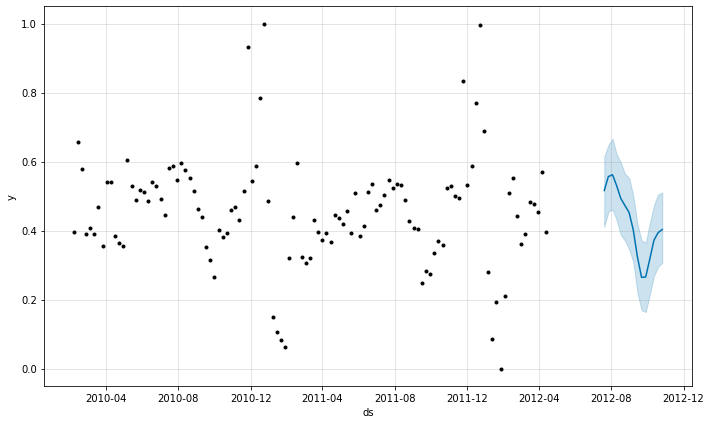

In [ ]:
model.plot(forecast)
plt.show()

In [ ]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.0,15.0,15.000000
mean,0.441536,0.320423,0.522430,0.441306,0.441810,-0.019751,-0.019751,-0.019751,-0.019751,-0.019751,-0.019751,0.0,0.0,0.0,0.421785
std,0.000766,0.099216,0.098039,0.000846,0.000672,0.099588,0.099588,0.099588,0.099588,0.099588,0.099588,0.0,0.0,0.0,0.100172
min,0.440337,0.163799,0.364143,0.439974,0.440768,-0.176785,-0.176785,-0.176785,-0.176785,-0.176785,-0.176785,0.0,0.0,0.0,0.264408
25%,0.440936,0.244257,0.448186,0.440646,0.441284,-0.092781,-0.092781,-0.092781,-0.092781,-0.092781,-0.092781,0.0,0.0,0.0,0.348241
50%,0.441536,0.308523,0.510815,0.441309,0.441802,-0.037130,-0.037130,-0.037130,-0.037130,-0.037130,-0.037130,0.0,0.0,0.0,0.403207
75%,0.442135,0.398522,0.605517,0.441972,0.442335,0.062172,0.062172,0.062172,0.062172,0.062172,0.062172,0.0,0.0,0.0,0.504564
max,0.442735,0.460887,0.666878,0.442623,0.442873,0.119525,0.119525,0.119525,0.119525,0.119525,0.119525,0.0,0.0,0.0,0.561917


In [ ]:
test_y=df['y'][valInd:]
y_hat=forecast.yhat

In [ ]:
test_y=test_y.to_numpy()
y_hat=y_hat.to_numpy()

In [ ]:
rss=((test_y-y_hat)**2).sum()
mse=np.mean((test_y-y_hat)**2)
print("Final rmse value is =",np.sqrt(np.mean((test_y-y_hat)**2)))

Final rmse value is = 0.06466637520707792


#Pickeling the model

In [ ]:
pickle.dump(model,open(r'gdrive/My Drive/Colab Notebooks/TimeSeries/Walmart_Notebooks/W_Stores2_Prophet.sav','wb'))